# Breast Cancer Detection

Over the past decades, machine learning techniques have been widely used in intelligent health systems, particularly for breast cancer diagnosis and prognosis. In this article, I will walk you through how to create a breast cancer detection model using machine learning and the Python programming language.

Breast cancer is one of the most common cancers in women globally, accounting for the majority of new cancer cases and cancer-related deaths according to global statistics, making it a major public health problem in the world. today’s society.

Early diagnosis of breast cancer can dramatically improve prognosis and chances of survival, as it can promote timely clinical treatment of patients. More precise classification of benign tumours can prevent patients from undergoing unnecessary treatments.

Dataset :- https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [ ]:
#import libraries
import numpy as np #2 perform mathematical operations on arrays
import pandas as pd #for data analysis
import sklearn.datasets #embeds sm small toy datasets 
import seaborn as sns #statistical graphics

from sklearn.linear_model import LogisticRegression #predict the propability of a categorical dependent variable
from sklearn.model_selection import train_test_split #measure the accuracy of the model 
from sklearn.metrics import accuracy_score #measure model performance
from sklearn.model_selection import cross_val_score #statistical method used to estimate the performance (or accuracy) of machine learning models
from sklearn.preprocessing import StandardScaler #resize the distribution of values
from sklearn.neighbors import KNeighborsClassifier #represents the K nearest neighbors
from sklearn.svm import SVC #fit the data u provide, returning a "best fit" hyperplane that devides/categorizes ur data

In [ ]:
#getting the dataset frm sklearn
breast_cancer = sklearn.datasets.load_breast_cancer()

#printing the dataset
print(breast_cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
#assigning data as x
x = breast_cancer.data 

#assigning labels as y
y = breast_cancer.target 

In [ ]:
print(x) #printing the data
print("--------------------------------------------------------------------------------------------------")
print(y) #printing the labels

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
--------------------------------------------------------------------------------------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 

### Printing names of features

In [ ]:
#printing the names of features
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

### Checking Dimensions of x and y

In [ ]:
#printing the sahpe of data & labels
print(x.shape, y.shape)

(569, 30) (569,)


### Storing data as pandas dataframe to perform further operations 

In [ ]:
#loading the data 2 pandas dataframe 
#by creating variable named "data"
#wyt columns of features names
data = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)

In [ ]:
#making a class called "class"
#class represents labels which is 0/1
data['class'] = breast_cancer.target 

### Printing the head of the dataset to have a look at the dataframe

In [ ]:
#printing the Top 10 sample values in the dataframe
data.head(10) 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


### Having a look at details of the data

In [ ]:
#now lets c statistical values of data
#Basic Descriptive statistics on the data
data.describe(include = "all")

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### Counterplot
Showing the total count of malignant and benign tumor patients in counterplot.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


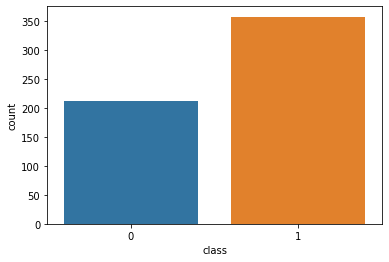

In [ ]:
#counts no of observations per category
sns.countplot(data['class'])

#### Checking Number of benign and malignant cases

In [ ]:
#v can c how many examples r there for class 1 & 0
print(data['class'].value_counts()) 

1    357
0    212
Name: class, dtype: int64


In [ ]:
#lets c wht 0 & 1 r
print(breast_cancer.target_names)

['malignant' 'benign']


In [ ]:
#v r just finding the mean values of malignant & benign
#in malignant stage cancer the size of the breast is big compared 2 benign stage cancer(by the values of the mean)
#that difference is very much imp for this classification
data.groupby('class').mean() 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


0 - Malignant

1 - Benign

#### Dividing data into train and test data using sklearn's train_test_split()

In [ ]:
#spliting the dataset in2 Training & Testing 

#x_train --> Training Data // x_test --> Testing Data
#y_train --> Label for training data // y_test --> Label for testing data
#Labels --> 0 & 1 

#spliting the dataset based on test size v needed
#test size --> 2 specify the percentage of test data needed ==> 0.1 ==> 10%

#random state --> specific split of data each value of random_state splits the data differently, v can put any state v want
#v need 2 specify the same random_state everytym if v want 2 split the data the same way everytym

#stratifying it based on the y, so that the data is split in the crt way
#stratify --> for crt distribution of data as of the original data(2 split the data correctly as of the original data)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42, stratify = y)

In [ ]:
#lets c how many examples r there for each cases
#checking dimension of target
print(y.shape, y_train.shape, y_test.shape) 

(569,) (512,) (57,)


In [ ]:
#checking dimension of features
print(x.shape, x_train.shape, x_test.shape)

(569, 30) (512, 30) (57, 30)


In [ ]:
#checking mean of target
#mean value should b same for original data, train data & test data
print(y.mean(), y_train.mean(), y_test.mean())

0.6274165202108963 0.626953125 0.631578947368421


In [ ]:
#checking mean of features
#the mean value of x, x_train & x_test will not b same
#coz there r 30 features & differs for each feature
print(x.mean(), x_train.mean(), x_test.mean())

61.890712339519624 61.643943173802086 64.10730554736843


In [ ]:
#printing the substrain
print(x_train) 

[[1.499e+01 2.211e+01 9.753e+01 ... 1.308e-01 3.163e-01 9.251e-02]
 [1.989e+01 2.026e+01 1.305e+02 ... 1.613e-01 2.549e-01 9.136e-02]
 [1.048e+01 1.986e+01 6.672e+01 ... 6.736e-02 2.883e-01 7.748e-02]
 ...
 [1.114e+01 1.407e+01 7.124e+01 ... 3.922e-02 2.576e-01 7.018e-02]
 [9.876e+00 1.940e+01 6.395e+01 ... 9.749e-02 2.622e-01 8.490e-02]
 [1.065e+01 2.522e+01 6.801e+01 ... 6.136e-02 3.409e-01 8.147e-02]]


## Our data is ready to be applied a machine learning algorithm

# ***Logistic Regression***

### Implementing Logistic Regression without scaling

In [ ]:
#loading the logistic regression 2 the variable "clf"
#training the model on training data
#v r fitting the data x_train 2 the clf which is the logistic regression model, so the model is trained with the data
clf = LogisticRegression().fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## **Evaluation of the model**

## Predicting seen data with our Logistic Regression ML model

In [ ]:
#prediction on train_data
train_pred = clf.predict(x_train)
train_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,

## Predicting unseen data with our Logistic Regression ML model

In [ ]:
#prediction on test_data
test_pred = clf.predict(x_test)
test_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1])

## Checking Accuracy of Logistic Regression ML model with training data and testing data

In [ ]:
#v r finding the accuracy_score on the training data 2 check how the model performs on traing data 
train_accuracy = accuracy_score(y_train, train_pred)

#v r finding the accuracy_score on the testing data 2 check how the model performs on testing data
test_accuracy = accuracy_score(y_test, test_pred)

In [ ]:
#print the accuracy_score on training data
print("Training accuracy: ", train_accuracy)

#print the accuracy_score on testing data
print("Testing accuracy: ", test_accuracy)

Training accuracy:  0.951171875
Testing accuracy:  0.9298245614035088


## Logistic Regression ML model Score

In [ ]:
#mean accuracy (accuracy score)
#measuring the accuracy of the model against the training data 
clf.score(x_train, y_train)

0.951171875

In [ ]:
#mean accuracy (accuracy score)
#measuring the accuracy of the model against the test data 
clf.score(x_test, y_test)

0.9298245614035088

Lets Cross Validate and Check how the model performs.

In [ ]:
#cross validation
#it is used to protect against overfitting in a predictive model, 
#particularly in a case where the amount of data may be limited. In cross-validation, 
#you make a fixed number of folds (or partitions) of the data, run the analysis on each fold, and then average the overall error estimate.
#cv = 5 ==> partition the data in2 4 Training & 1 Testing Data parts
print(cross_val_score(clf, x, y, cv = 5))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[0.93859649 0.93859649 0.95614035 0.94736842 0.95575221]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


### Logistic Regression Model Has Performed Wonderfully After Feature Selection
#### Let's look a few more models to see how they perform

# ***SVM***

### Implementing Support Vector Machine Algorithm

In [ ]:
#loading the SVM 2 the variable "clf_svm"
#training the SVM Model with Training Data
#v r fitting the data x_train, y_train 2 the model which is the svm model, so the model is trained with the data
#rbf(Rdial Basis Function) Kernel is so popular coz of its similarity 2 KNN Algo
#rbf kernel SVM just needs 2 store the support vectors during tarining & not the entire dataset
clf_svm = SVC(kernel = 'rbf').fit(x_train, y_train)

### Predicting seen data with our SVM ML model

In [ ]:
#prediction on train_data
svmtrain_pred = clf_svm.predict(x_train)
svmtrain_pred

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,

### Predicting unseen data with our SVM ML model

In [ ]:
#prediction on test_data
svmtest_pred = clf_svm.predict(x_test)
svmtest_pred

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1])

## Checking Accuracy of SVM ML model with training data and testing data

In [ ]:
#v r finding the accuracy_score on the training data 2 check how the model performs on traing data 
svmtrain_accuracy = accuracy_score(y_train, svmtrain_pred)

#v r finding the accuracy_score on the testing data 2 check how the model performs on testing data 
svmtest_accuracy = accuracy_score(y_test, svmtest_pred)

In [ ]:
#print the accuracy_score on training data
print("Training accuracy: ", svmtrain_accuracy)

#print the accuracy_score on testing data
print("Testing accuracy: ", svmtest_accuracy)

Training accuracy:  0.91796875
Testing accuracy:  0.9298245614035088


## SVM ML MODEL SCORE

In [ ]:
#mean accuracy (accuracy score)
#measuring the accuracy of the model against the training data 
clf_svm.score(x_train, y_train)

0.91796875

In [ ]:
#mean accuracy (accuracy score)
#measuring the accuracy of the model against the test data 
clf_svm.score(x_test, y_test)

0.9298245614035088

In [ ]:
#cross validation
#it is used to protect against overfitting in a predictive model, 
#particularly in a case where the amount of data may be limited. In cross-validation, 
#you make a fixed number of folds (or partitions) of the data, run the analysis on each fold, and then average the overall error estimate.
#cv = 5 ==> partition the data in2 4 Training & 1 Testing Data parts
print(cross_val_score(clf_svm, x, y, cv = 5))

[0.85087719 0.89473684 0.92982456 0.94736842 0.9380531 ]


# ***KNN***


### Implementing K Nearest neighbors classifier

In [ ]:
#loading the KNN 2 the variable "clf_knn"
#training the KNN Model with Training Data
#v r fitting the data x_train, y_train 2 the model which is the knn model, so the model is trained with the data
#v r assuming K(n_neighbors) = 3 ==> it would find three nearest data points
clf_knn = KNeighborsClassifier(n_neighbors = 3).fit(x_train, y_train)

### Predicting seen data with our KNN ML model

In [ ]:
#prediction on train_data
trainknn_pred = clf_knn.predict(x_train)
trainknn_pred

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,

### Predicting unseen data with our KNN ML model

In [ ]:
#Predicting Unseen Data
testknn_pred = clf_knn.predict(x_test)
testknn_pred

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1])

## Checking Accuracy of KNN ML model with training data and testing data

In [ ]:
#v r finding the accuracy_score on the training data 2 check how the model performs on traing data
trainknn_accuracy = accuracy_score(y_train, trainknn_pred)

#v r finding the accuracy_score on the testing data 2 check how the model performs on testing data
testknn_accuracy = accuracy_score(y_test, testknn_pred)

In [ ]:
#print the accuracy_score on training data
print("Training accuracy: ", trainknn_accuracy)

#print the accuracy_score on testing data
print("Testing accuracy: ", testknn_accuracy)

Training accuracy:  0.955078125
Testing accuracy:  0.9122807017543859


## KNN ML MODEL SCORE

In [ ]:
#mean accuracy (accuracy score)
#measuring the accuracy of the model against the training data 
clf_knn.score(x_train, y_train)

0.955078125

In [ ]:
#mean accuracy (accuracy score)
#measuring the accuracy of the model against the test data 
clf_knn.score(x_test, y_test)

0.9122807017543859

In [ ]:
#cross validation
#it is used to protect against overfitting in a predictive model, 
#particularly in a case where the amount of data may be limited. In cross-validation, 
#you make a fixed number of folds (or partitions) of the data, run the analysis on each fold, and then average the overall error estimate.
#cv = 5 ==> partition the data in2 4 Training & 1 Testing Data parts
print(cross_val_score(clf_knn, x, y, cv = 5))

[0.87719298 0.92105263 0.94736842 0.93859649 0.91150442]


# Comparing Out of Sample Accuracies

In [ ]:
#create a dictionary with three keys: 'LogisticRegression', 'SVM' and 'KNN'
#assigns the values of test_accuracy, svmtest_accuracy, and testknn_accuracy to the variables acc_dict.
acc_dict = {'LogisticRegression' : test_accuracy, 'SVM' : svmtest_accuracy, 'KNN' : testknn_accuracy}

#printing the values 
acc_dict

{'KNN': 0.9122807017543859,
 'LogisticRegression': 0.9298245614035088,
 'SVM': 0.9298245614035088}

# **Summary**
As we can see all our models have performed brilliantly after feature selection and is giving good out of sample accuracy. Hence, there is no need for Optimization/Hyperparameter Optimization, So we can state that our model is ready to be deployed. So this is how we can build a Breast cancer detection model using Machine Learning and the Python programming language. I hope you liked this project on how to build a breast cancer detection model with Machine Learning. 

However, the best cross validation score was given by LogisticRegression & SVM model.
So let's pickle and save our model.

# Saving the trained model

In [ ]:
import pickle #keeps track of the objects it has already serialized ==> allows saving model in very little tym

In [ ]:
#save the model trained in the file "trained_model.sav" to a new file called "breastcancer_trained_model.pkl"
filename = 'breastcancer_trained_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
#loading the saved model
loaded_model = pickle.load(open('breastcancer_trained_model.sav', 'rb'))

In [ ]:
#v r predicting by giving the input 
input_data = (17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189)
#change input_data 2 numpy_array 2 make prediction
input_data_as_numpy_array = np.asarray(input_data)
print(input_data)

#reshape the array as v r predicting the output for 1 instance 
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

#prediction
prediction = loaded_model.predict(input_data_reshaped)
print(prediction) #returns a list with element [0] if Malignant else [1] for Benign

if (prediction[0] == 0):
  print('Cancer is in Malignant stage')
else:
  print("Cancer is in Benign stage")

(17.99, 10.38, 122.8, 1001, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 2019, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189)
[0]
Cancer is in Malignant stage
